In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus as pp
import seaborn as sns

from IPython.display import display
from IPython.display import Image

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import train_test_split

In [2]:
class CONFIG:
    INDEXS = ["R2 Pred", "R2", "EV", "ME", "MEAN_AE", "MSE", "MEDIAN_AE"]

# Load Dataset

In [3]:
header = pd.read_csv("Dataset/header.csv", header=None)
header

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable


In [4]:
training_dataset = pd.read_csv("Dataset/Training/Features_Variant_1.csv",
                               header=None,
                               names=[header.iat[0, i] for i in range(0, 54)])
training_dataset.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
23256,1204214,0,6418,1,0.0,104.0,5.901099,3.0,11.674670,0.0,...,0,0,0,0,1,0,0,0,0,0
11252,101655,0,33,8,0.0,7.0,0.663158,0.0,1.334644,0.0,...,0,0,1,0,0,0,0,0,0,0
25302,367390,0,2678,100,0.0,107.0,11.753138,7.0,15.139026,0.0,...,0,1,1,0,0,0,0,0,0,3
34940,1501889,0,33752,14,0.0,103.0,5.093023,3.0,11.424808,0.0,...,0,0,1,0,0,0,0,0,0,0
22713,3032492,4584,114769,9,0.0,571.0,24.915888,8.0,64.156951,0.0,...,0,0,1,0,0,0,0,0,0,0
30269,41813,0,10840,2,0.0,257.0,44.440678,24.0,55.146422,0.0,...,1,0,1,0,0,0,0,0,0,1
37064,28325843,1,571967,61,11.0,2079.0,186.193878,114.0,254.125498,0.0,...,0,0,0,0,0,1,0,0,0,114
38276,570,0,38,16,5.0,31.0,13.000000,10.0,6.675328,0.0,...,0,0,0,0,0,0,1,0,0,0
27327,1975842,35,140870,9,0.0,1005.0,136.370213,83.0,157.919435,0.0,...,0,0,0,0,0,0,0,0,1,1
40253,1548753,10803,59597,9,0.0,1479.0,80.312821,42.0,139.650808,0.0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
features = training_dataset.iloc[:, :53]
features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,1,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,0
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
labels = training_dataset.iloc[:, -1:]
labels

,Target Variable
0,0
1,0
2,0
3,0
4,0
...,...
40944,1
40945,2
40946,72
40947,28


In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)

# Random Forest

## Model Training

In [8]:
def train_model(model):
    model.fit(X_train, y_train.values.ravel())
    predict = model.predict(X_test)
    polt_trees_mean_ae(model)
    return predict

In [9]:
def polt_trees_mean_ae(model):
    mean_aes = pd.DataFrame(
        {
            "Mean Absolute Error": [mean_absolute_error(tree.predict(X_test), y_test) for tree in model.estimators_], 
            "Single Decision Tree": [i for i in range(0, len(model.estimators_))]
        }
    )
    sns.barplot(x="Single Decision Tree", y="Mean Absolute Error", data=mean_aes)
    plt.show()
    dts_result = pd.DataFrame(
        [model.estimators_[dt].predict(X_test).tolist() for dt in range(len(model.estimators_))]
    )
    print(dts_result.sample(n=10, axis=1).describe())
    sns.boxplot(data=dts_result.sample(n=10, axis=1))
    plt.show()

In [10]:
def plot_test_predict(y_train, y_test, predict, axes=None, k=None):
    test_predict = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(predict.transpose())], axis=1)
    headers = ["Test", "Predict"]
    test_predict.columns = headers
    if axes is not None and k is not None:
        sns.lineplot(data=test_predict.sample(n=50), ax=axes[k]).set_title("Test Predict Curve k = " + str(k))
    else:
        sns.lineplot(data=test_predict.sample(n=50)).set_title("Test Predict Curve")
    plt.show()
    sns.residplot(x=y_test.to_numpy(), y=predict, lowess=True).set_title("Residuals")
    plt.show()

## Model Evaluation

In [11]:
def evaluate(model, X_test, y_test, predict):

    # R-Squared Prediction
    r2_pred = model.score(X_test, y_test)
    
    # R-Squared
    r2 = r2_score(y_test, predict)
    
    # Explained Variance Score
    ev = explained_variance_score(y_test, predict)
    
    # Max Error
    me = max_error(y_test, predict)
    
    # Mean Absolute Error
    mean_ae = mean_absolute_error(y_test, predict)
    
    # Mean Squared Error
    mse = mean_squared_error(y_test, predict)
    
    # Median Absolute Error
    median_ae = median_absolute_error(y_test, predict)
    
    return r2_pred, r2, ev, me, mean_ae, mse, median_ae

## Final Model

In [12]:
def train_final_model(max_depth=None, min_samples_split=2, n_estimators=100):
    # DecisionTreeRegressor
    
    model = RandomForestRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        n_estimators=n_estimators,
        random_state=42,
    )

    # Model Training
    predict = train_model(model)
    plot_test_predict(y_train, y_test, predict)

    # Model Evaluation
    r2_pred, r2, ev, me, mean_ae, mse, median_ae = evaluate(model, X_test, y_test, predict)

    results = pd.DataFrame({
        "Index": CONFIG.INDEXS, 
        "Mean": [r2_pred, r2, ev, me, mean_ae, mse, median_ae]
    })
    print(results)

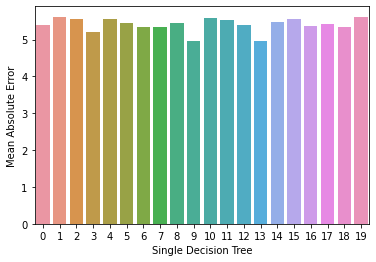

           1838       9159       1979       4799       11344      7180   \
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean    3.972542   0.459474  17.218258   0.119726  42.428817   1.611013   
std     2.051686   0.138520   4.993476   0.033257  16.266385   1.383202   
min     2.141631   0.181777  10.556237   0.073143  11.507511   0.250000   
25%     2.383707   0.356215  14.229108   0.094735  37.147990   0.486061   
50%     2.994095   0.475757  16.052644   0.114159  46.011970   1.377872   
75%     5.440335   0.538860  17.516788   0.124760  53.088107   2.156813   
max     7.985915   0.818605  28.391304   0.204960  63.886525   5.205128   

           10457      280        7236       9666   
count  20.000000  20.000000  20.000000  20.000000  
mean    0.376845   0.120407   1.210186   0.095971  
std     0.104124   0.034578   0.528251   0.033764  
min     0.181777   0.073143   0.537489   0.042854  
25%     0.314248   0.094735   0.844941   0.073827  
50%     0.34

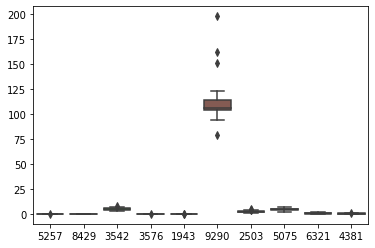

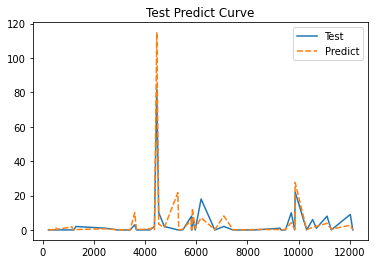

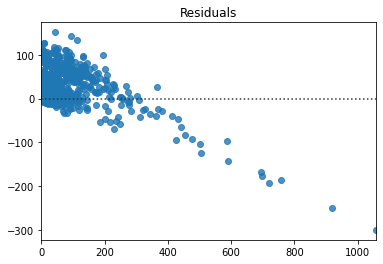

       Index        Mean
0    R2 Pred    0.451972
1         R2    0.451972
2         EV    0.452121
3         ME  901.448444
4    MEAN_AE    4.947798
5        MSE  556.515138
6  MEDIAN_AE    0.587196


In [13]:
train_final_model(max_depth=10, min_samples_split=.02, n_estimators=20)